# OLYMPICS DATA ANAYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load data sets

In [2]:
athletes = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

In [7]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### data inspection

##### inspecting athletes dataset

In [28]:
athletes.shape

(271116, 15)

In [9]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [15]:
athletes.describe(include=np.number)

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [16]:
athletes.describe(exclude=np.number)

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


In [19]:
athletes.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [3]:
import sidetable

athletes.stb.missing(style=True)

,missing,total,percent
Medal,"231,333","271,116",85.33%
Weight,"62,875","271,116",23.19%
Height,"60,171","271,116",22.19%
Age,"9,474","271,116",3.49%
ID,0,"271,116",0.00%
Name,0,"271,116",0.00%
Sex,0,"271,116",0.00%
Team,0,"271,116",0.00%
NOC,0,"271,116",0.00%
Games,0,"271,116",0.00%


##### inspecting regions dataset

In [29]:
regions.shape

(230, 3)

In [17]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [18]:
regions.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,MAD,Germany,North Borneo
freq,1,4,1


In [22]:
regions.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

In [23]:
regions.stb.missing(style=True)

,missing,total,percent
notes,209,230,90.87%
region,3,230,1.30%
NOC,0,230,0.00%


### Joining the 2 dataframes

In [4]:
athletes_data = athletes.merge(regions, how = 'left', on = 'NOC')
athletes_data.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


#### inspecting merged dataset

In [30]:
athletes_data.shape

(271116, 17)

In [31]:
athletes_data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [5]:
# making column names consistent

athletes_data.rename(columns={'region' : 'Region', 'notes' :'Notes'}, inplace=True)
athletes_data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region', 'Notes'],
      dtype='object')

In [33]:
athletes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [38]:
athletes_data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [39]:
# check for missing values

athletes_data.stb.missing(style=True)

,missing,total,percent
Notes,"266,077","271,116",98.14%
Medal,"231,333","271,116",85.33%
Weight,"62,875","271,116",23.19%
Height,"60,171","271,116",22.19%
Age,"9,474","271,116",3.49%
Region,370,"271,116",0.14%
Season,0,"271,116",0.00%
Event,0,"271,116",0.00%
Sport,0,"271,116",0.00%
City,0,"271,116",0.00%


In [40]:
# check for null/missing


nan_values = athletes_data.isna()
nan_columns = nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

### Inspecting Data for specific countries

##### India

In [6]:
athletes_data.query('Team == "India"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


> **Medals won by Team India**

In [79]:
athletes_data.query('Team == "India"')[['Medal']].value_counts()

Medal 
Gold      138
Bronze     40
Silver     19
dtype: int64

##### Japan

In [49]:
athletes_data.query('Team == "Japan"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


> **Medals won by Team Japan**

In [78]:
athletes_data.query('Team == "Japan"')[['Medal']].value_counts()

Medal 
Bronze    357
Silver    307
Gold      247
dtype: int64

### Ghana Olympics

> **Medals won by Team Ghana**

In [77]:
athletes_data.query('Team == "Ghana"')[['Medal']].value_counts()

Medal 
Bronze    22
Silver     1
dtype: int64

In [63]:
athletes_data.query('Team == "Ghana"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
800,458,Felix Ahmed Aboagye,M,20.0,176.0,70.0,Ghana,GHA,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,NaN,Ghana,NaN
1189,667,"Benjamin ""Ben"" Acheampong",M,25.0,161.0,62.0,Ghana,GHA,1964 Summer,1964,Summer,Tokyo,Football,Football Men's Football,NaN,Ghana,NaN
1190,668,Gemma Acheampong,F,23.0,163.0,54.0,Ghana,GHA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Ghana,NaN
1191,669,Joachim Yaw Acheampong,M,18.0,181.0,73.0,Ghana,GHA,1992 Summer,1992,Summer,Barcelona,Football,Football Men's Football,Bronze,Ghana,NaN
1294,728,George Wilson Acquaah,M,26.0,NaN,NaN,Ghana,GHA,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's 100 metres,NaN,Ghana,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267337,133753,Abdul Aziz Zakari,M,24.0,178.0,73.0,Ghana,GHA,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's 100 metres,NaN,Ghana,NaN
267338,133753,Abdul Aziz Zakari,M,24.0,178.0,73.0,Ghana,GHA,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's 4 x 100 metres Relay,NaN,Ghana,NaN
267339,133753,Abdul Aziz Zakari,M,27.0,178.0,73.0,Ghana,GHA,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's 100 metres,NaN,Ghana,NaN
267340,133753,Abdul Aziz Zakari,M,27.0,178.0,73.0,Ghana,GHA,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's 4 x 100 metres Relay,NaN,Ghana,NaN


> bronze medals of Team Ghana

In [64]:
athletes_data.query('Team == "Ghana" & Medal == "Bronze"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
1191,669,Joachim Yaw Acheampong,M,18.0,181.0,73.0,Ghana,GHA,1992 Summer,1992,Summer,Barcelona,Football,Football Men's Football,Bronze,Ghana,NaN
1579,882,Simon Addo,M,17.0,180.0,79.0,Ghana,GHA,1992 Summer,1992,Summer,Barcelona,Football,Football Men's Football,Bronze,Ghana,NaN
1722,957,Sammi Adjei,M,18.0,NaN,NaN,Ghana,GHA,1992 Summer,1992,Summer,Barcelona,Football,Football Men's Football,Bronze,Ghana,NaN
5813,3272,Mamood Amadu,M,19.0,NaN,NaN,Ghana,GHA,1992 Summer,1992,Summer,Barcelona,Football,Football Men's Football,Bronze,Ghana,NaN
5838,3285,Frank Amankwah,M,20.0,NaN,NaN,Ghana,GHA,1992 Summer,1992,Summer,Barcelona,Football,Football Men's Football,Bronze,Ghana,NaN
5882,3317,Prince Amartey,M,28.0,177.0,75.0,Ghana,GHA,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Middleweight,Bronze,Ghana,NaN
9945,5436,Bernard Nii Aryee,M,19.0,NaN,NaN,Ghana,GHA,1992 Summer,1992,Summer,Barcelona,Football,Football Men's Football,Bronze,Ghana,NaN
10026,5478,Isaac Asare,M,17.0,NaN,NaN,Ghana,GHA,1992 Summer,1992,Summer,Barcelona,Football,Football Men's Football,Bronze,Ghana,NaN
11426,6240,Kwame Ayew,M,18.0,NaN,NaN,Ghana,GHA,1992 Summer,1992,Summer,Barcelona,Football,Football Men's Football,Bronze,Ghana,NaN
23224,12214,"Edward ""Eddie"" Blay",M,26.0,172.0,57.0,Ghana,GHA,1964 Summer,1964,Summer,Tokyo,Boxing,Boxing Men's Light-Welterweight,Bronze,Ghana,NaN


> **Ghana has 22 Bronze medals won in 1992 Men's Football held in Barcelona**

In [66]:
athletes_data.query('Team == "Ghana" & Medal == "Silver"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
194935,97827,"Clement Isaac ""Ike"" Quartey",M,22.0,175.0,63.0,Ghana,GHA,1960 Summer,1960,Summer,Roma,Boxing,Boxing Men's Light-Welterweight,Silver,Ghana,NaN


#### USA

> **Medals won by USA**

In [76]:
athletes_data.query('Team == "United States"')[['Medal']].value_counts()

Medal 
Gold      2474
Silver    1512
Bronze    1233
dtype: int64

In [68]:
athletes_data.Team.value_counts()

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Gran Gesto           1
Bonaparte            1
Brentina             1
Formosa              1
Kln                  1
Name: Team, Length: 1184, dtype: int64

#### Top countries that have participated in the olympics

In [80]:
top_10_countries = athletes_data.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

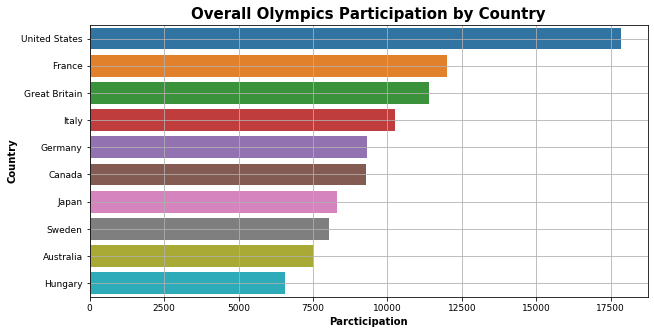

In [87]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=top_10_countries.values, y = top_10_countries.index)
plt.title('Overall Olympics Participation by Country', size=15, weight='bold')
plt.xlabel('Parcticipation', size=10, weight='bold')
plt.ylabel('Country', size=10, weight='bold')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid()
plt.show()

### Age distribution of the participants

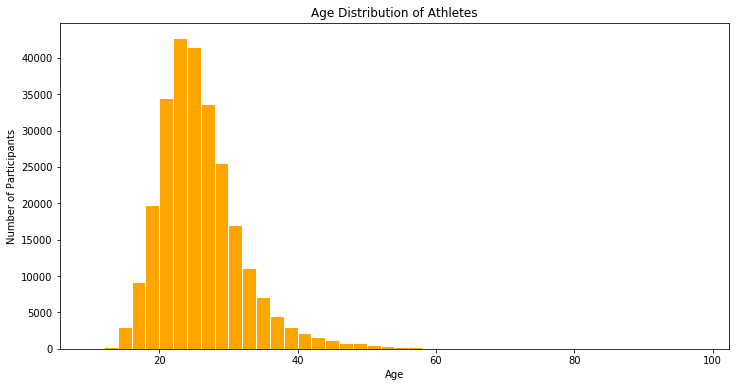

In [94]:
plt.figure(figsize=(12,6))
plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.hist(athletes_data.Age, bins=np.arange(10,100,2), color='orange', edgecolor='white')
plt.show()

### Getting the different kind and number of games held during winter and on summer

In [96]:
winter_sports = athletes_data[athletes_data.Season == 'Winter'].Sport.unique()
for sport in winter_sports:
    print(sport)

Speed Skating
Cross Country Skiing
Ice Hockey
Biathlon
Alpine Skiing
Luge
Bobsleigh
Figure Skating
Nordic Combined
Freestyle Skiing
Ski Jumping
Curling
Snowboarding
Short Track Speed Skating
Skeleton
Military Ski Patrol
Alpinism


In [97]:
summer_sports = athletes_data[athletes_data.Season == 'Summer'].Sport.unique()
for sport in summer_sports:
    print(sport)

Basketball
Judo
Football
Tug-Of-War
Athletics
Swimming
Badminton
Sailing
Gymnastics
Art Competitions
Handball
Weightlifting
Wrestling
Water Polo
Hockey
Rowing
Fencing
Equestrianism
Shooting
Boxing
Taekwondo
Cycling
Diving
Canoeing
Tennis
Modern Pentathlon
Golf
Softball
Archery
Volleyball
Synchronized Swimming
Table Tennis
Baseball
Rhythmic Gymnastics
Rugby Sevens
Trampolining
Beach Volleyball
Triathlon
Rugby
Lacrosse
Polo
Cricket
Ice Hockey
Racquets
Motorboating
Croquet
Figure Skating
Jeu De Paume
Roque
Basque Pelota
Alpinism
Aeronautics


> **There are much more olympic sports held in Summer than in Winter**

> **Male and Female Participants in Olympics

In [99]:
gender_counts = athletes_data.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

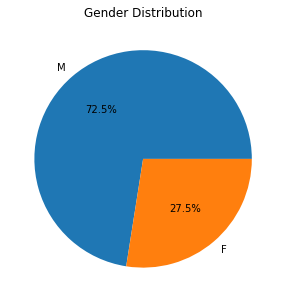

In [101]:
plt.figure(figsize=(5,5))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.show()

> **Medals Won**

In [102]:
athletes_data.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

### Total Number of Femal Athletes in each olympic event

In [105]:
female_participants = athletes_data[(athletes_data.Sex == 'F') & (athletes_data.Season == 'Summer')][['Sex', 'Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.head()

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


In [106]:
female_participants.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [119]:
womenInOlympics = athletes_data[(athletes_data.Sex == 'F') & (athletes_data.Season == 'Summer')]
womenInOlympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


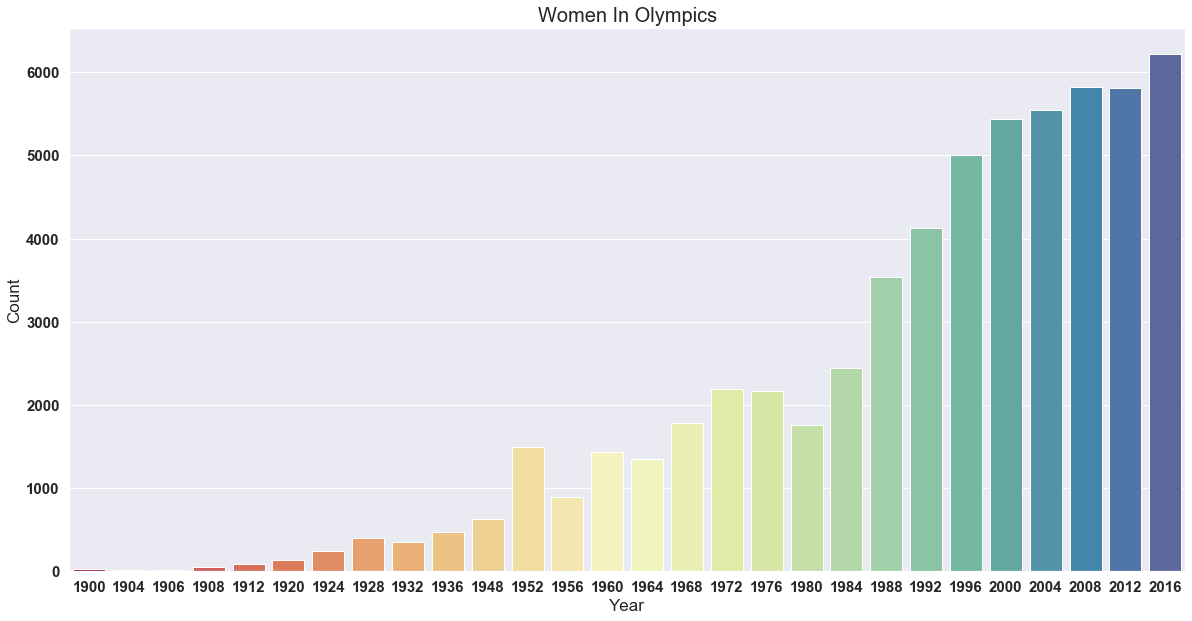

In [116]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=womenInOlympics, palette='Spectral')
plt.title('Women In Olympics', size=20)
plt.xticks(fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.xlabel('Year', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.show()

> **Female Athletes over Time**

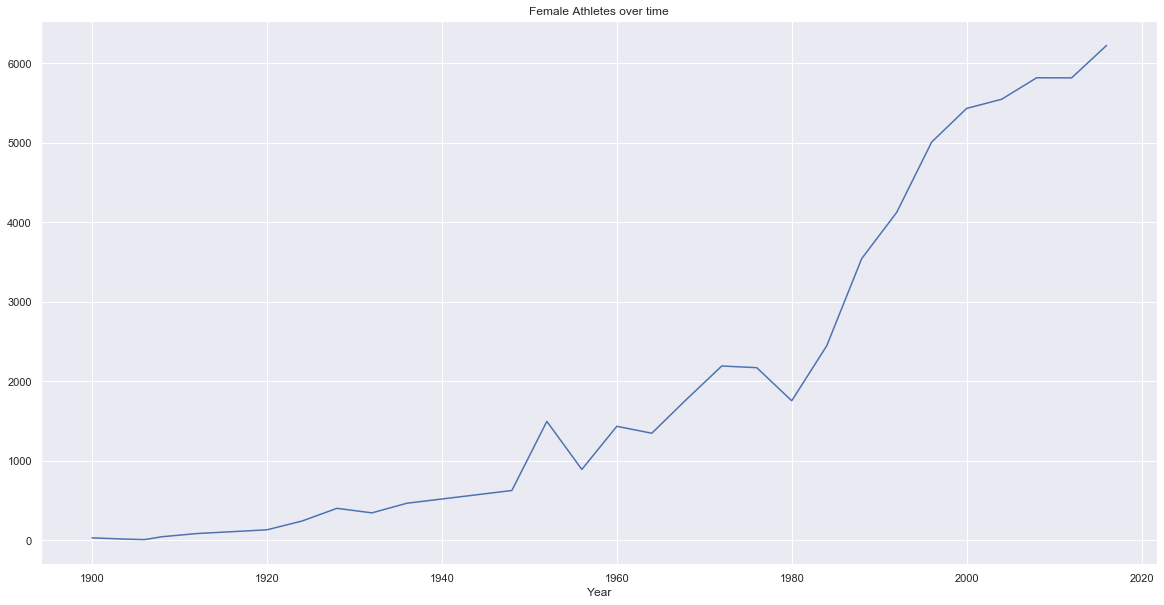

In [146]:
part = womenInOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:, 'F'].plot()
plt.title('Female Athletes over time')
plt.show()

#### Gold medal athletes

In [7]:
goldMedals = athletes_data[athletes_data.Medal == 'Gold']
goldMedals.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [8]:
# remove nan values

goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]
goldMedals

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold,Germany,NaN
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,Netherlands,NaN
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,Netherlands,NaN


#### Inspect rare incidents of athletes achieving gold medals at age beyond 60 years

In [9]:
goldMedals[['ID', 'Name', 'Sport', 'Team', 'NOC']][goldMedals.Age > 60]

,ID,Name,Sport,Team,NOC
104003,52626,Isaac Lazarus Israls,Art Competitions,Netherlands,NED
105199,53238,Charles Jacobus,Roque,United States,USA
190952,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",Archery,Cincinnati Archers,USA
226374,113773,"Galen Carter ""G. C."" Spencer",Archery,Potomac Archers,USA
233390,117046,Oscar Gomer Swahn,Shooting,Sweden,SWE
261102,130662,"Robert W. Williams, Jr.",Archery,Potomac Archers,USA


In [10]:
sporting_event = goldMedals['Sport'][goldMedals['Age']>60]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

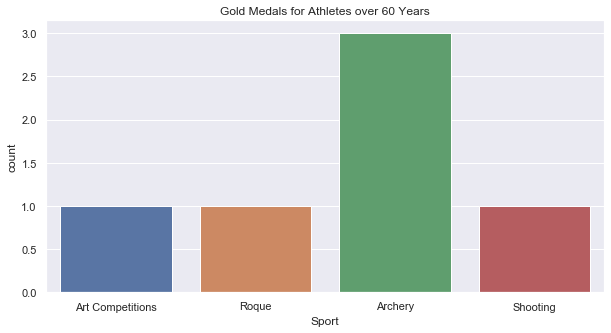

In [163]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(sporting_event)
plt.title('Gold Medals for Athletes over 60 Years')
plt.show()

#### Gold medals for each country

In [11]:
goldMedals.Region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


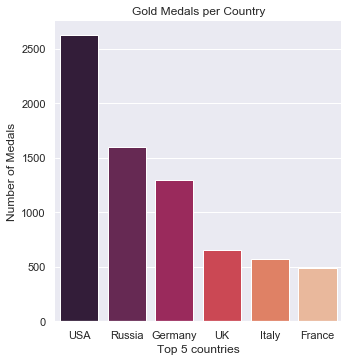

In [165]:
totalGoldMedals = goldMedals.Region.value_counts().reset_index(name='Medal').head(6)
g = sns.catplot(x='index', y='Medal', data=totalGoldMedals, height=5, kind='bar', palette='rocket')
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels('Number of Medals')
plt.title('Gold Medals per Country')
plt.show()

### Analyzing the most recent olympics in the dataset

In [12]:
max_year = athletes_data.Year.max()
max_year

2016

> Getting Team names that participated and won most Gold Medals

In [13]:
team_names = athletes_data[(athletes_data.Year == max_year) & (athletes_data.Medal == 'Gold')].Team
team_names.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

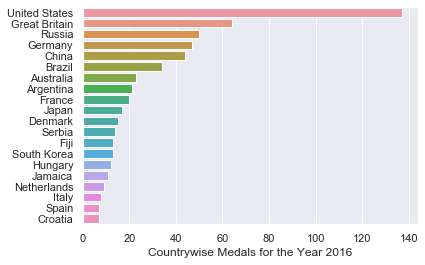

In [170]:
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)
plt.ylabel(None)
plt.xlabel('Countrywise Medals for the Year 2016')
plt.show()

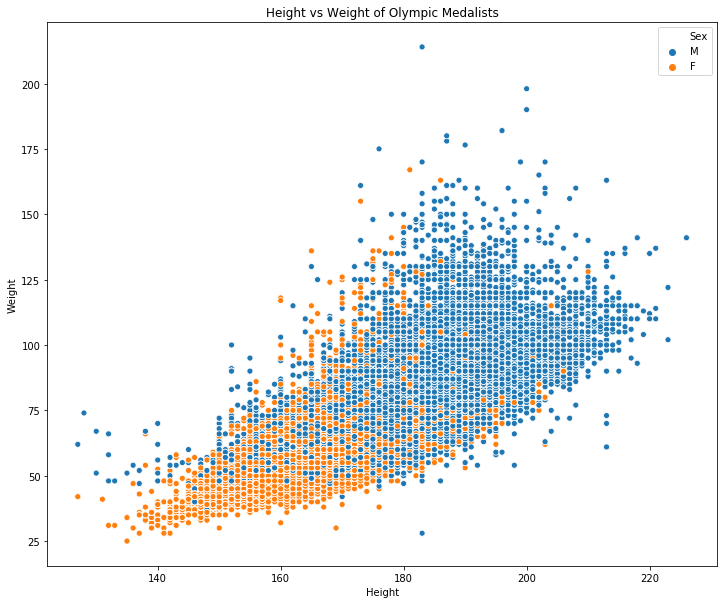

In [14]:
not_null_medals = athletes_data[(athletes_data.Height.notnull()) & (athletes_data.Weight.notnull())]
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='Height', y='Weight', data=not_null_medals, hue='Sex')
plt.title('Height vs Weight of Olympic Medalists')
plt.show()